#### Choose your stock and convert it into csv file

In [1]:
import pandas as pd

read_file = pd.read_csv (r'C:\Users\hp\OneDrive\Documents\Python for data science and machine learning bootcamp\Apple stocks\msft.us.txt')
read_file.to_csv (r'C:\Users\hp\OneDrive\Documents\Python for data science and machine learning bootcamp\Apple stocks\msft.us.csv', index=None)

Importing the libraries

In [5]:
# RNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

4.5.4


In [6]:
# Importing the dataset
dataset = pd.read_csv('msft.us.csv')
# Creating an numpy arrray of dataset
training_set = dataset.iloc[:,0:2]

Interactive plot of complete dataset

In [7]:
training_set.iplot(kind='line',y='Open',x='Date')

We have to choose the training set accordingly where we can find significant shift in the stock prices. If your system has high computational power, take the whole dataset

In [8]:
training_set = dataset.iloc[6005:,0:2]
training_set.iplot(kind='line',y='Open',x='Date')

In [9]:
# feature scaling
training_set = dataset.iloc[6005:-20,1:2].values
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
training_set = mms.fit_transform(training_set)

In [10]:
X_train = []
y_train = []

# creating a time series:     use timesteps --> 100 
time_step = 100;
for i in range(time_step,len(training_set)):
    X_train.append(training_set[i-time_step:i,0])
    y_train.append(training_set[i,0])

#converting list into array
X_train = np.array(X_train);y_train = np.array(y_train)

# We know that LSTM layer takes 3 dimentional array
#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [11]:
X_train.shape

(1858, 100, 1)

In [12]:
#Building an rnn

#importing the keras libraries
from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM


Using TensorFlow backend.


In [13]:
#adding layers
regressor = Sequential()
regressor.add(LSTM(units=200,return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train,y_train,epochs=200,batch_size=100)

Epoch 1/200
1858/1858 [==============================] - 8s 4ms/step - loss: 0.0322
Epoch 2/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 3/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0015
Epoch 4/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0012
Epoch 5/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0013
Epoch 6/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0012
Epoch 7/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 8/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0010
Epoch 9/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0010
Epoch 10/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0012
Epoch 11/200
1858/1858 [==============================] - 6s 3ms/step - loss: 0.0011
Epoch 12/200
1858/1858 [==============================] - 6s 3ms/step - lo

1858/1858 [==============================] - 6s 3ms/step - loss: 5.2928e-04
Epoch 95/200
1858/1858 [==============================] - 6s 3ms/step - loss: 6.3565e-04
Epoch 96/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.3916e-04
Epoch 97/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.3738e-04
Epoch 98/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.3821e-04
Epoch 99/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.4596e-04
Epoch 100/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.5539e-04
Epoch 101/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.2381e-04
Epoch 102/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.0290e-04
Epoch 103/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.4858e-04
Epoch 104/200
1858/1858 [==============================] - 6s 3ms/step - loss: 6.8974e-04
Epoch 105/200
1858/1858 [====

1858/1858 [==============================] - 6s 3ms/step - loss: 3.9863e-04
Epoch 186/200
1858/1858 [==============================] - 6s 3ms/step - loss: 5.0196e-04
Epoch 187/200
1858/1858 [==============================] - 6s 3ms/step - loss: 4.3431e-04
Epoch 188/200
1858/1858 [==============================] - 6s 3ms/step - loss: 3.9304e-04
Epoch 189/200
1858/1858 [==============================] - 6s 3ms/step - loss: 3.8202e-04
Epoch 190/200
1858/1858 [==============================] - 6s 3ms/step - loss: 3.9013e-04
Epoch 191/200
1858/1858 [==============================] - 6s 3ms/step - loss: 3.9109e-04
Epoch 192/200
1858/1858 [==============================] - 6s 3ms/step - loss: 4.0678e-04
Epoch 193/200
1858/1858 [==============================] - 6s 3ms/step - loss: 4.1918e-04
Epoch 194/200
1858/1858 [==============================] - 6s 3ms/step - loss: 4.2548e-04
Epoch 195/200
1858/1858 [==============================] - 6s 3ms/step - loss: 3.9298e-04
Epoch 196/200
1858/1858 

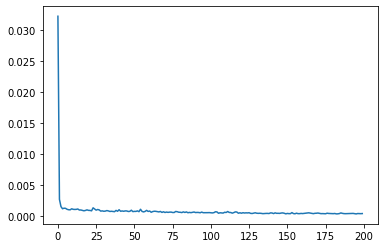

In [15]:
losses = regressor.history.history
losses = pd.DataFrame(losses)
losses['loss'].plot()

In [16]:
dataset_test  = dataset.iloc[-20:,1:2]

In [17]:
real_stocks = dataset_test['Open'].values

In [18]:
dataset_total =dataset.iloc[6005:,1:2].values

In [19]:
dataset_total = mms.transform(dataset_total)

In [20]:
time_step=100
prediction_stocks = []
# creating a time series:     use timesteps --> 80 
for i in range(len(dataset_total)-20,len(dataset_total)):
    prediction_stocks.append(dataset_total[i-time_step:i])

In [21]:
prediction_stocks = np.array(prediction_stocks)

In [22]:
prediction_stocks = np.reshape(prediction_stocks,(prediction_stocks.shape[0],prediction_stocks.shape[1],1))
predictions = regressor.predict(prediction_stocks)
predictions = mms.inverse_transform(predictions)

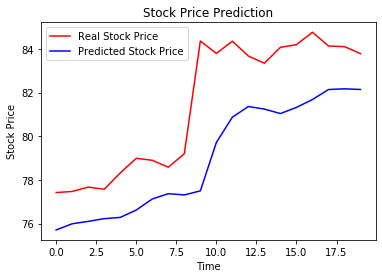

In [27]:
#visulising the results
plt.plot(real_stocks, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
R = pd.DataFrame(real_stocks)
P = pd.DataFrame(predictions)
Data = pd.concat([R,P],axis=1)

In [25]:
Data.columns=['RealStocks','PredictedStocks']

In [26]:
Data[['RealStocks','PredictedStocks']].iplot(kind='spread')

C:\Users\hp\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Improving the performance of your stocks 
- Getting more training data: we trained our model on the past few years, but it would be even better to train it on more data.
- Increasing the number of timesteps: the model remembered the stock prices from the 100 previous financial days to predict the stock price of the next day. That’s because we chose a number of 100 timesteps. You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
- Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of microsoft, you could add this other stock price as a new indicator in the training data.
- Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
- Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 200 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.